In [24]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data = load_breast_cancer()
X = data.data
y = data.target


df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)

In [28]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)


In [29]:
def plot_feature_importance(df):
    plt.figure(figsize=(15, 6))
    sns.boxplot(data=df.iloc[:, :10])  # Plot first 10 features
    plt.xticks(rotation=45)
    plt.title('Distribution of First 10 Features')
    plt.show()


In [30]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


In [31]:
def plot_roc_curve(y_true, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

In [32]:
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto', 0.1]
}

svm_grid = GridSearchCV(SVC(probability=True), svm_param_grid, cv=5, scoring='accuracy')
svm_grid.fit(X_train_scaled, y_train)
svm_best = svm_grid.best_estimator_

In [33]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)
knn_best = knn_grid.best_estimator_

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [34]:
svm_pred = svm_best.predict(X_test_scaled)
svm_pred_proba = svm_best.predict_proba(X_test_scaled)[:, 1]

knn_pred = knn_best.predict(X_test_scaled)
knn_pred_proba = knn_best.predict_proba(X_test_scaled)[:, 1]


In [35]:
print("Dataset Information:")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print("\nFeature names:")
for i, feature in enumerate(data.feature_names[:10], 1):
    print(f"{i}. {feature}")


Dataset Information:
Number of features: 30
Number of samples: 569

Feature names:
1. mean radius
2. mean texture
3. mean perimeter
4. mean area
5. mean smoothness
6. mean compactness
7. mean concavity
8. mean concave points
9. mean symmetry
10. mean fractal dimension


In [36]:
print("\nBest Parameters:")
print("SVM:", svm_grid.best_params_)
print("KNN:", knn_grid.best_params_)



Best Parameters:
SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}


In [37]:
print("\nSVM Results:")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("\nClassification Report:")
print(classification_report(y_test, svm_pred, target_names=['Malignant', 'Benign']))

print("\nKNN Results:")
print("Accuracy:", accuracy_score(y_test, knn_pred))
print("\nClassification Report:")
print(classification_report(y_test, knn_pred, target_names=['Malignant', 'Benign']))



SVM Results:
Accuracy: 0.9824561403508771

Classification Report:
              precision    recall  f1-score   support

   Malignant       1.00      0.95      0.98        43
      Benign       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


KNN Results:
Accuracy: 0.9649122807017544

Classification Report:
              precision    recall  f1-score   support

   Malignant       0.95      0.95      0.95        43
      Benign       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



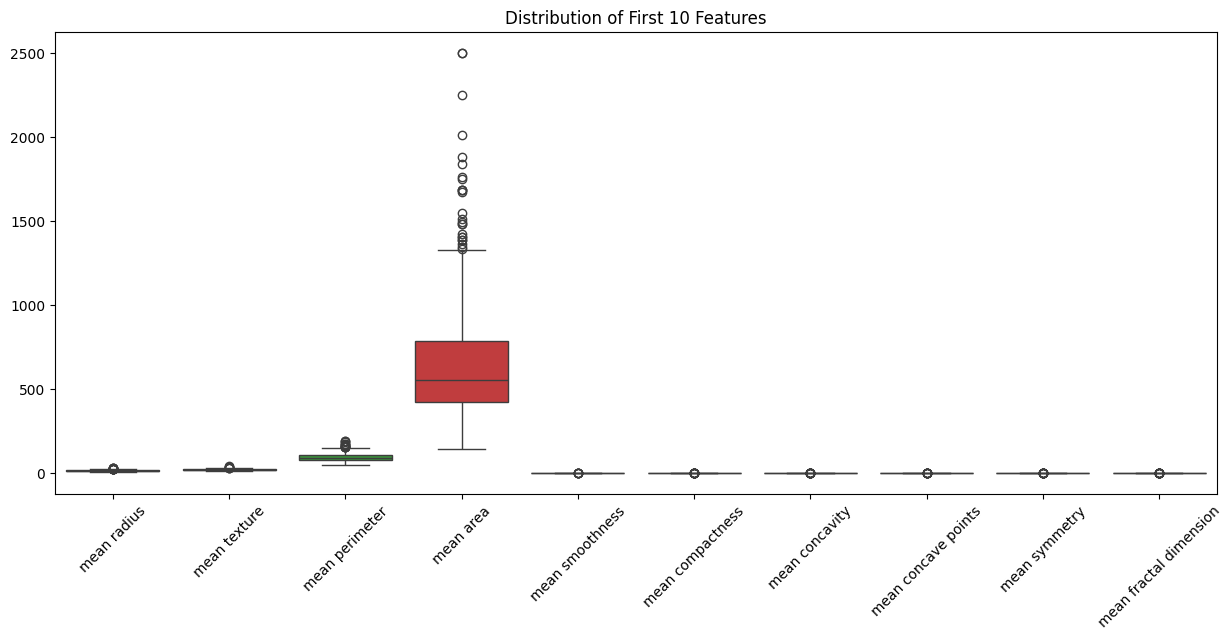

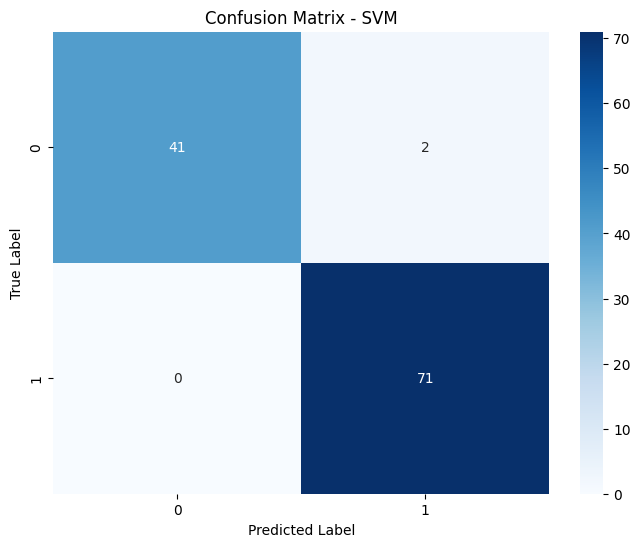

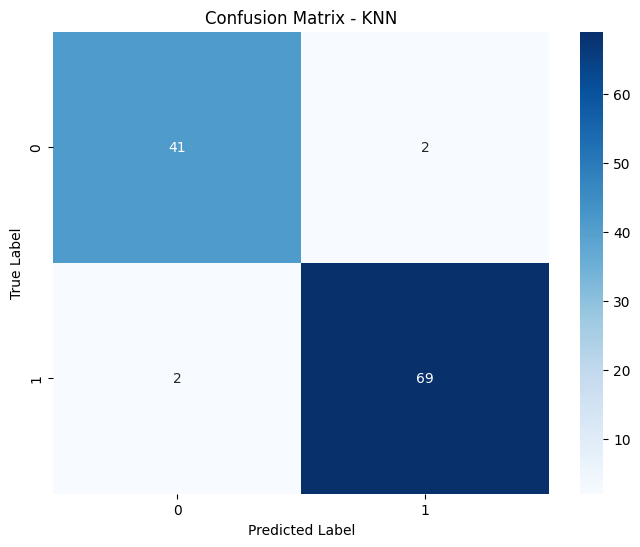

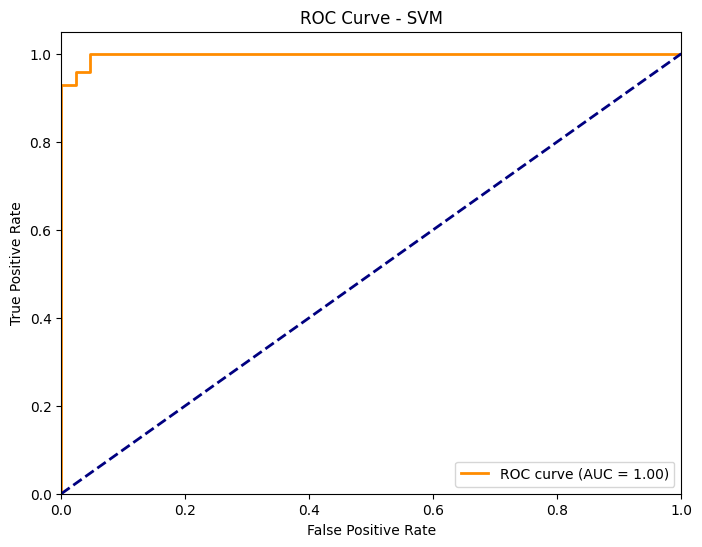

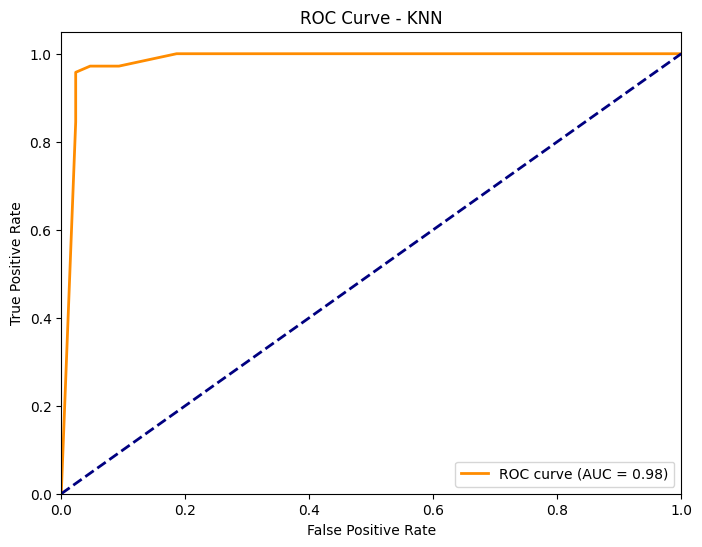

In [38]:
plot_feature_importance(df)
plot_confusion_matrix(y_test, svm_pred, "SVM")
plot_confusion_matrix(y_test, knn_pred, "KNN")
plot_roc_curve(y_test, svm_pred_proba, "SVM")
plot_roc_curve(y_test, knn_pred_proba, "KNN")


In [39]:
metrics_comparison = pd.DataFrame({
    'Model': ['SVM', 'KNN'],
    'Accuracy': [
        accuracy_score(y_test, svm_pred),
        accuracy_score(y_test, knn_pred)
    ],
    'Best Parameters': [
        str(svm_grid.best_params_),
        str(knn_grid.best_params_)
    ]
})

print("\nModel Comparison:")
print(metrics_comparison)


Model Comparison:
  Model  Accuracy                                    Best Parameters
0   SVM  0.982456        {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
1   KNN  0.964912  {'metric': 'manhattan', 'n_neighbors': 5, 'wei...
